In [4]:
import numpy as np
from skimage import data
from skimage . color import rgb2gray
import matplotlib . pyplot as plt
from mpl_toolkits . mplot3d import Axes3D
import cv2
from tqdm import tqdm
from numba import njit
import time
import matplotlib.pyplot as plt

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [5]:
fgt = "../teddy/disp2.png"
foccl = "../teddy/occl.png"
fleft = "../teddy/im2.png"
fright = "../teddy/im6.png"

gt = cv2.imread(fgt, cv2.IMREAD_GRAYSCALE)
occl = cv2.imread(foccl, cv2.IMREAD_GRAYSCALE)
left = cv2.imread(fleft, cv2.IMREAD_GRAYSCALE)
right = cv2.imread(fright, cv2.IMREAD_GRAYSCALE)

In [6]:
from stereo import stereoMatching, mode_filter, stereo_2
lmap, rmap = stereo_2(left, right, 30)

100%|█████████████████████████████████████████| 375/375 [01:08<00:00,  5.49it/s]


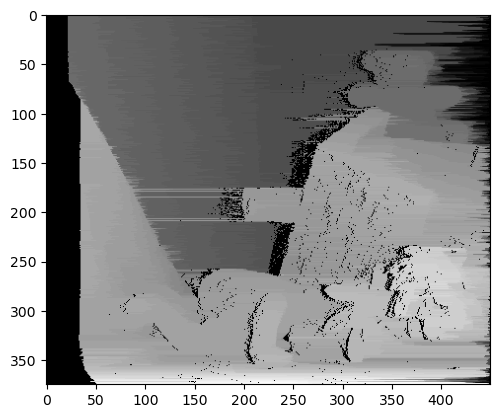

In [7]:
plt.imshow(lmap, cmap="gray")

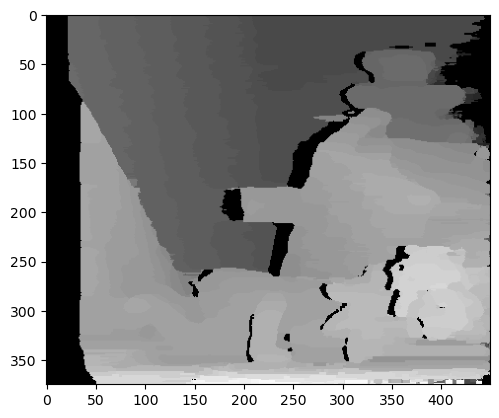

In [10]:
disp = np.interp(lmap, (np.min(lmap), np.max(lmap)), (0, 255)).astype(np.uint8)
disp = mode_filter(disp, 7)
disp = np.where(disp <= 30, 0, disp)
plt.imshow(disp, cmap="gray")

In [15]:
from skimage import io
io.imsave("DP_test.png", disp)

In [11]:
from evaldisp import evaldisp
evaldisp(gt, occl, disp)

(5.9908058674646565, 0.9054103703703704, 0.9035022222222222)

In [13]:
val, count = np.unique(disp, return_counts=True)

In [14]:
count

array([20118,    81,    86,   196,    69,    84,    64,    48,   118,
       11556,  7321,  6813,  8036,  9533,  8191,  6312,  4767,  1363,
         219,    48,    23,   458,   892,  2152,  4165,  9701, 10040,
       20769,  8172,  3884,  4579,  3857,  2887,   913,  1586,  1804,
        2776,  1877,  1586,   221,   295,   327,   105,   158,   186,
         286,    28])